In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

### Importing data

In [2]:
df = pd.read_csv("data/1_RELIANCE.NS.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0
1,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0
2,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0
3,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0
4,1996-01-08,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0
...,...,...,...,...,...,...,...
6859,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0
6860,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0
6861,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0
6862,2023-04-05,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0


### Analyzing data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6864 entries, 0 to 6863
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6864 non-null   object 
 1   Open       6854 non-null   float64
 2   High       6854 non-null   float64
 3   Low        6854 non-null   float64
 4   Close      6854 non-null   float64
 5   Adj Close  6854 non-null   float64
 6   Volume     6854 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.5+ KB


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6854.000000,6854.000000,6854.000000,6854.000000,6854.000000,6.854000e+03
mean,561.214367,567.989559,553.892609,560.659326,540.999078,2.887217e+07
std,684.040719,691.370900,676.106817,683.411827,684.524174,4.833373e+07
min,11.836550,11.890704,11.763055,11.890704,7.827301,0.000000e+00
25%,51.995720,52.734539,51.069298,52.067281,40.694492,6.688851e+06
50%,410.954559,415.560913,404.948990,410.261139,379.914611,1.222644e+07
75%,558.691666,567.124207,545.550629,556.323502,515.695495,3.072089e+07
max,2856.149902,2856.149902,2786.100098,2819.850098,2811.385742,6.686620e+08


In [5]:
df.isna().sum()

Date          0
Open         10
High         10
Low          10
Close        10
Adj Close    10
Volume       10
dtype: int64

In [6]:
# finding the index labels of rows containing null values
null_rows = df[df.isnull().any(axis=1)].index

# print the index labels
print(null_rows)

Int64Index([1899, 2169, 2291, 3607, 4085, 4124, 4254, 4296, 4633, 4862], dtype='int64')


In [7]:
df = df.dropna()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0
1,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0
2,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0
3,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0
4,1996-01-08,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0
...,...,...,...,...,...,...,...
6859,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0
6860,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0
6861,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0
6862,2023-04-05,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Converting object variable `date` to datetime

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 6863
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6854 non-null   object 
 1   Open       6854 non-null   float64
 2   High       6854 non-null   float64
 3   Low        6854 non-null   float64
 4   Close      6854 non-null   float64
 5   Adj Close  6854 non-null   float64
 6   Volume     6854 non-null   float64
dtypes: float64(6), object(1)
memory usage: 428.4+ KB


In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0
1,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0
2,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0
3,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0
4,1996-01-08,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0
...,...,...,...,...,...,...,...
6859,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0
6860,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0
6861,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0
6862,2023-04-05,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0


In [11]:
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\samee\AppData\Local\Temp\ipykernel_17220\936118274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = pd.to_datetime(df["Date"])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 6863
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6854 non-null   datetime64[ns]
 1   Open       6854 non-null   float64       
 2   High       6854 non-null   float64       
 3   Low        6854 non-null   float64       
 4   Close      6854 non-null   float64       
 5   Adj Close  6854 non-null   float64       
 6   Volume     6854 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 428.4 KB


In [13]:
df["Year"] = df["Date"].dt.year
df

C:\Users\samee\AppData\Local\Temp\ipykernel_17220\1791414994.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df["Date"].dt.year


,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,1996
1,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0,1996
2,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,1996
3,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0,1996
4,1996-01-08,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0,1996
...,...,...,...,...,...,...,...,...
6859,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0,2023
6860,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0,2023
6861,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0,2023
6862,2023-04-05,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0,2023


In [14]:
df["Month"] = df["Date"].dt.month

C:\Users\samee\AppData\Local\Temp\ipykernel_17220\1957367309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Month"] = df["Date"].dt.month


In [15]:
df["Day"] = df["Date"].dt.day

C:\Users\samee\AppData\Local\Temp\ipykernel_17220\234562627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day"] = df["Date"].dt.day


In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,1996-01-02,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,1996,1,2
1,1996-01-03,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0,1996,1,3
2,1996-01-04,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,1996,1,4
3,1996-01-05,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0,1996,1,5
4,1996-01-08,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0,1996,1,8
...,...,...,...,...,...,...,...,...,...,...
6859,2023-03-29,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0,2023,3,29
6860,2023-03-31,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0,2023,3,31
6861,2023-04-03,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0,2023,4,3
6862,2023-04-05,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0,2023,4,5


In [17]:
df = df.drop("Date", axis=1)
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,1996,1,2
1,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0,1996,1,3
2,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,1996,1,4
3,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0,1996,1,5
4,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0,1996,1,8
...,...,...,...,...,...,...,...,...,...
6859,2239.000000,2244.800049,2211.100098,2234.699951,2234.699951,8678073.0,2023,3,29
6860,2255.000000,2343.449951,2254.699951,2331.050049,2331.050049,13001005.0,2023,3,31
6861,2345.000000,2349.000000,2315.000000,2331.449951,2331.449951,4750238.0,2023,4,3
6862,2348.000000,2348.000000,2308.550049,2325.850098,2325.850098,7505339.0,2023,4,5


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6854 entries, 0 to 6863
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6854 non-null   float64
 1   High       6854 non-null   float64
 2   Low        6854 non-null   float64
 3   Close      6854 non-null   float64
 4   Adj Close  6854 non-null   float64
 5   Volume     6854 non-null   float64
 6   Year       6854 non-null   int64  
 7   Month      6854 non-null   int64  
 8   Day        6854 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 535.5 KB


### Dealing with outliers

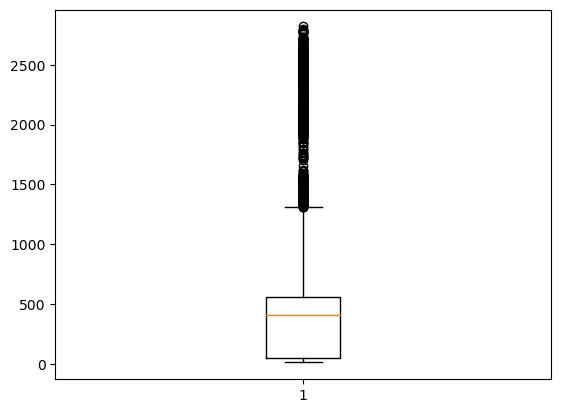

In [19]:
plt.boxplot(df["Close"]);

In [20]:
q1 = np.quantile(df["Close"], 0.25)

q3 = np.quantile(df["Close"], 0.75)
med = np.median(df["Close"])

iqr = q3-q1


upper_bound = q3 + (1 * iqr)
lower_bound = q1 - (1 * iqr)


outliers = (df['Close'] < lower_bound) | (df['Close'] > upper_bound)
df = df[~outliers]

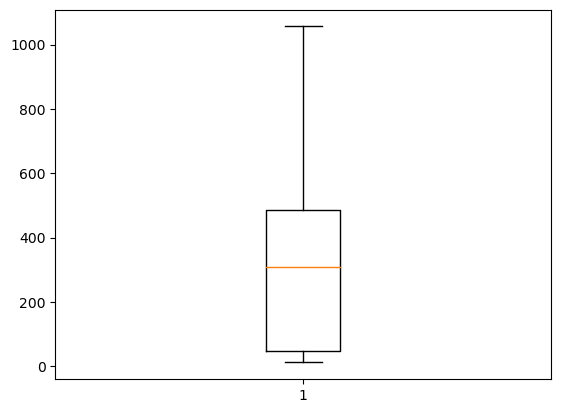

In [21]:
plt.boxplot(df["Close"]);

In [22]:
df['Close'].mean()

289.33829613216477

In [23]:
df["Close"].median()

307.584412

In [24]:
df['Close'].min()

11.890704

In [25]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
count,5705.000000,5705.000000,5705.000000,5705.000000,5705.000000,5.705000e+03,5705.000000,5705.000000,5705.000000
mean,289.705598,293.515470,285.542145,289.338296,267.953934,3.267227e+07,2006.661174,6.452410,15.771253
std,253.383779,256.424441,249.916898,252.935393,243.185030,5.205124e+07,6.554899,3.439044,8.784534
min,11.836550,11.890704,11.763055,11.890704,7.827301,0.000000e+00,1996.000000,1.000000,1.000000
25%,46.247643,46.943913,45.489487,46.170280,37.118332,7.120063e+06,2001.000000,3.000000,8.000000
50%,307.089111,313.924316,300.897797,307.584412,274.996460,1.453887e+07,2007.000000,6.000000,16.000000
75%,484.804535,489.831879,479.083771,484.259705,451.248199,3.623203e+07,2012.000000,9.000000,23.000000
max,1099.577148,1106.412354,1047.421509,1056.188354,1045.714966,6.686620e+08,2020.000000,12.000000,31.000000


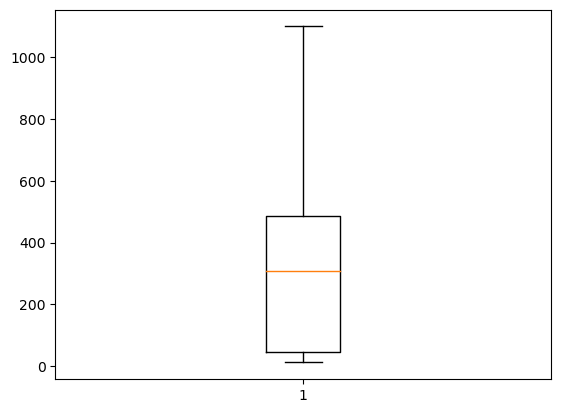

In [26]:
plt.boxplot(df["Open"]);

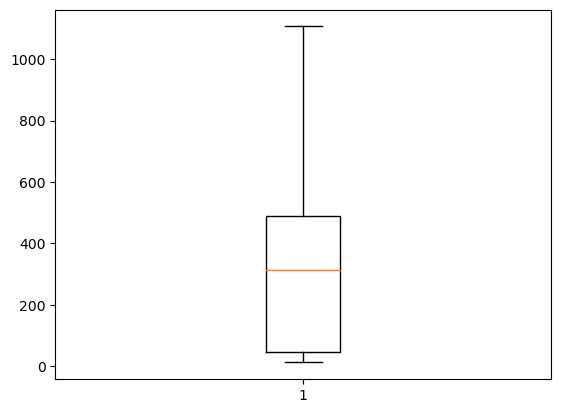

In [29]:
plt.boxplot(df['High']);

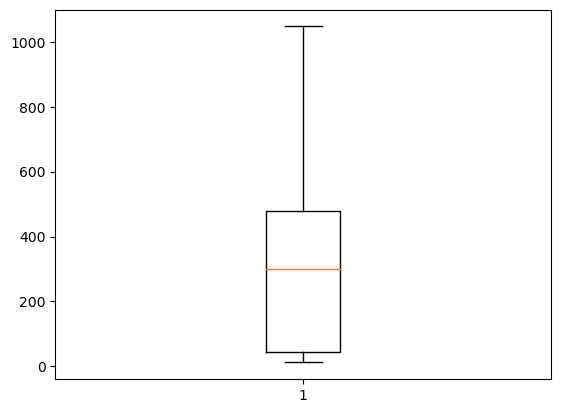

In [32]:
plt.boxplot(df['Low']);

In [35]:
print("Median: ")
df.median()

Median: 


Open         3.070891e+02
High         3.139243e+02
Low          3.008978e+02
Close        3.075844e+02
Adj Close    2.749965e+02
Volume       1.453887e+07
Year         2.007000e+03
Month        6.000000e+00
Day          1.600000e+01
dtype: float64

In [36]:
print("Mean: ")
df.mean()

Mean: 


Open         2.897056e+02
High         2.935155e+02
Low          2.855421e+02
Close        2.893383e+02
Adj Close    2.679539e+02
Volume       3.267227e+07
Year         2.006661e+03
Month        6.452410e+00
Day          1.577125e+01
dtype: float64

# Training

In [37]:
X = df.drop("Close", axis=1)
y = df["Close"]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4564, 8), (1141, 8), (4564,), (1141,))

In [39]:
# Defining a method from training of different algorithms
from sklearn.metrics import r2_score, mean_squared_error
r2_score_dict = {}
mse_score_dict = {}
def simple_train_model(model_name):
    model = model_name
    model.fit(X_train, y_train)
    model_preds = model.predict(X_test)
    score = r2_score(model_preds, y_test)
    mse = mean_squared_error(y_test, model_preds)
    return mse, score

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [41]:
r2_score_dict['Linear Regression'] = simple_train_model(LinearRegression())
r2_score_dict['Random Forest Regressor'] = simple_train_model(RandomForestRegressor())
r2_score_dict['Ridge'] = simple_train_model(Ridge())
r2_score_dict['Lasso'] = simple_train_model(Lasso())
r2_score_dict['Decision Tree Regressor'] = simple_train_model(DecisionTreeRegressor())

D:\Miniconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.478e+04, tolerance: 2.945e+04
  model = cd_fast.enet_coordinate_descent(


In [42]:
r2_df = pd.DataFrame.from_dict(r2_score_dict, orient='index', columns=['MSE', 'R2 Score'])

print(r2_df)

                               MSE  R2 Score
Linear Regression        10.592297  0.999828
Random Forest Regressor   6.792094  0.999890
Ridge                    10.592338  0.999828
Lasso                    27.929854  0.999547
Decision Tree Regressor  10.836292  0.999824


<Axes: xlabel='Close', ylabel='Count'>

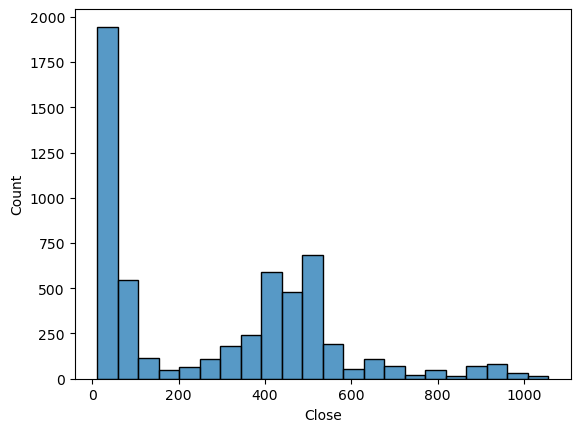

In [43]:
import seaborn as sns
sns.histplot(data=df, x='Close')

Since the `Close` column shown above is right skewed (positive skewed), we will have to implement logarithmic transformation on it to normalize the data.

### Converting close column into log10

<Axes: xlabel='Close_log', ylabel='Count'>

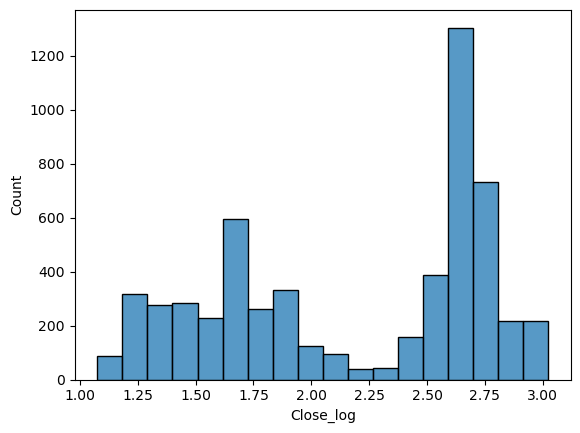

In [44]:
df['Close_log'] = np.log10(df['Close'])
sns.histplot(data=df, x='Close_log')

In [45]:
df

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,Close_log
0,15.878770,15.956133,15.677626,15.793671,10.396508,77875009.0,1996,1,2,1.198483
1,16.052837,16.783918,15.878770,15.913584,10.475444,96602936.0,1996,1,3,1.201768
2,15.762726,15.813012,15.553845,15.766594,10.378684,100099436.0,1996,1,4,1.197738
3,15.704703,15.704703,15.522900,15.658285,10.307388,76935930.0,1996,1,5,1.194744
4,15.627340,15.638945,14.876918,15.031645,9.894890,86288584.0,1996,1,8,1.177007
...,...,...,...,...,...,...,...,...,...,...
6108,907.596863,941.079529,867.427673,875.748779,867.064636,18769636.0,2020,3,23,2.942380
6109,921.267334,960.891724,887.388428,934.541504,925.274353,21106643.0,2020,3,24,2.970599
6111,1085.510498,1106.412354,1032.562378,1056.188354,1045.714966,21111073.0,2020,3,26,3.023741
6112,1084.718018,1096.902466,1036.376221,1055.593994,1045.126465,19225132.0,2020,3,27,3.023497


{'whiskers': [<matplotlib.lines.Line2D at 0x2148195a880>,
 'caps': [<matplotlib.lines.Line2D at 0x2149adc5cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x214819a1fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x214819c39a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x214819c34f0>],
 'means': []}

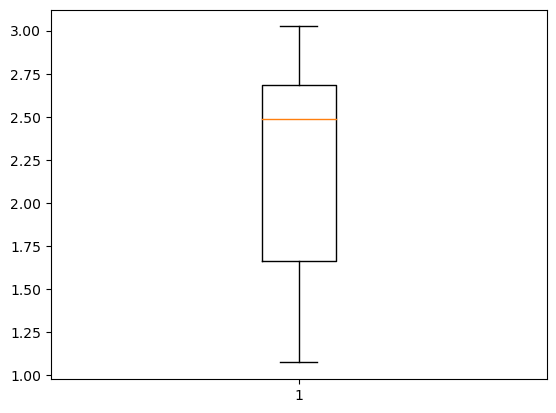

In [46]:
plt.boxplot(df['Close_log'])

In [47]:
log_df = df.drop("Close", axis=1)
log_df

,Open,High,Low,Adj Close,Volume,Year,Month,Day,Close_log
0,15.878770,15.956133,15.677626,10.396508,77875009.0,1996,1,2,1.198483
1,16.052837,16.783918,15.878770,10.475444,96602936.0,1996,1,3,1.201768
2,15.762726,15.813012,15.553845,10.378684,100099436.0,1996,1,4,1.197738
3,15.704703,15.704703,15.522900,10.307388,76935930.0,1996,1,5,1.194744
4,15.627340,15.638945,14.876918,9.894890,86288584.0,1996,1,8,1.177007
...,...,...,...,...,...,...,...,...,...
6108,907.596863,941.079529,867.427673,867.064636,18769636.0,2020,3,23,2.942380
6109,921.267334,960.891724,887.388428,925.274353,21106643.0,2020,3,24,2.970599
6111,1085.510498,1106.412354,1032.562378,1045.714966,21111073.0,2020,3,26,3.023741
6112,1084.718018,1096.902466,1036.376221,1045.126465,19225132.0,2020,3,27,3.023497


### Training on Log10 Columns

In [48]:
X = log_df.drop("Close_log", axis=1)
y = df["Close_log"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4564, 8), (1141, 8), (4564,), (1141,))

In [50]:
r2_score_dict['Linear Regression'] = simple_train_model(LinearRegression())
r2_score_dict['Random Forest Regressor'] = simple_train_model(RandomForestRegressor())
r2_score_dict['Ridge'] = simple_train_model(Ridge())
r2_score_dict['Lasso'] = simple_train_model(Lasso())
r2_score_dict['Decision Tree Regressor'] = simple_train_model(DecisionTreeRegressor())

In [51]:
r2_df = pd.DataFrame.from_dict(r2_score_dict, orient='index', columns=['MSE', 'R2 Score'])

print(r2_df)

                              MSE  R2 Score
Linear Regression        0.007079  0.977920
Random Forest Regressor  0.000017  0.999948
Ridge                    0.007079  0.977920
Lasso                    0.035431  0.870334
Decision Tree Regressor  0.000030  0.999907


### Ploting Score Graphs

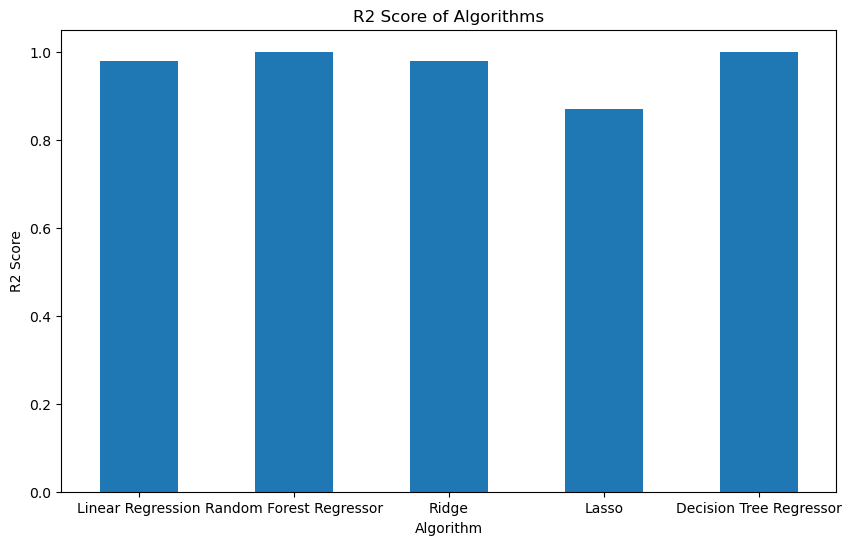

In [52]:
r2_df['R2 Score'].plot(kind='bar', rot=0, figsize=(10, 6))
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('R2 Score of Algorithms')
plt.savefig('r2_scores_graph.png')
plt.show()

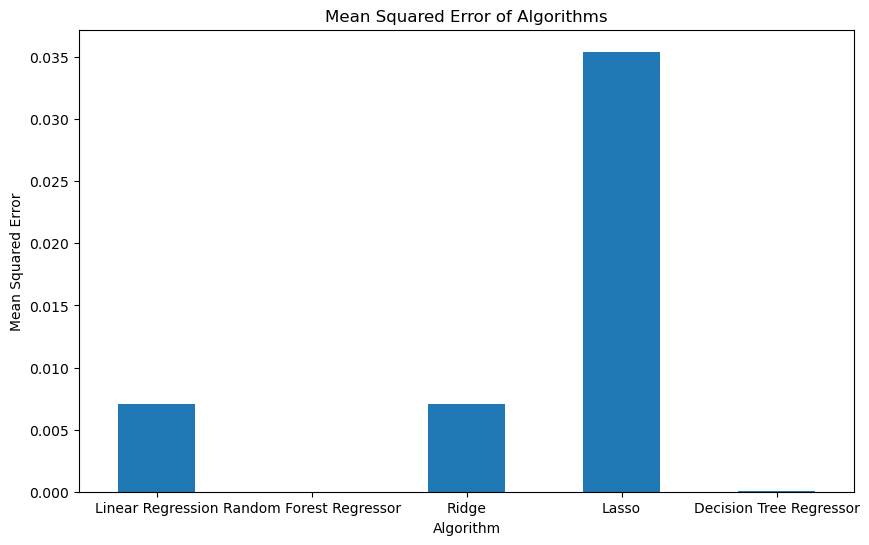

In [53]:
r2_df['MSE'].plot(kind='bar', rot=0, figsize=(10, 6))
plt.xlabel('Algorithm')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error of Algorithms')
plt.savefig('MSE_scores_graph.png')
plt.show()

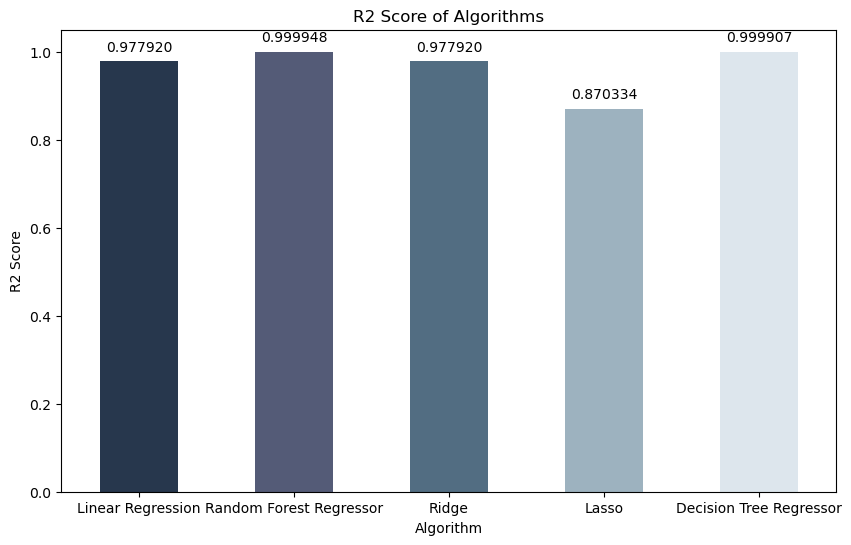

In [54]:
ax = r2_df['R2 Score'].plot(kind='bar', rot=0, figsize=(10, 6), color=['#27374D', '#545B77','#526D82', '#9DB2BF', '#DDE6ED'])
plt.xlabel('Algorithm')
plt.ylabel('R2 Score')
plt.title('R2 Score of Algorithms')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('r2_scores_graph.png')

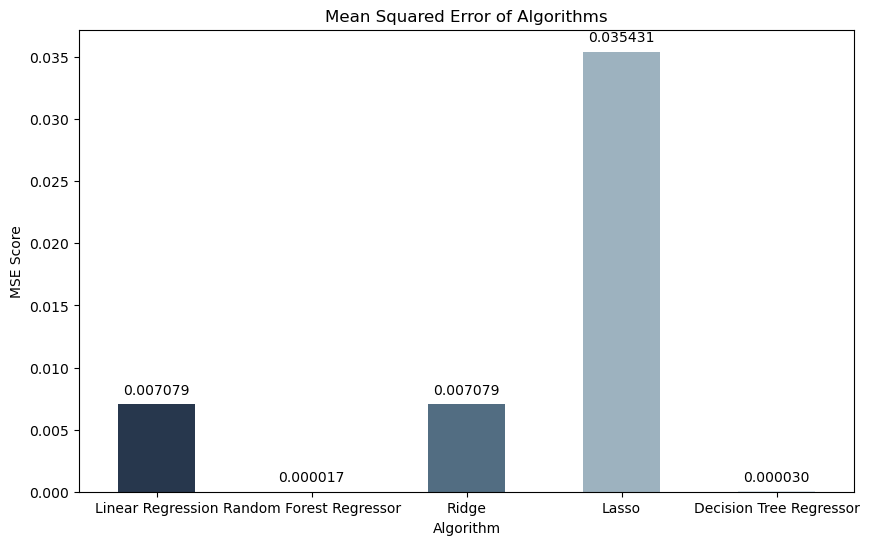

In [55]:
ax = r2_df['MSE'].plot(kind='bar', rot=0, figsize=(10, 6), color=['#27374D', '#545B77','#526D82', '#9DB2BF', '#DDE6ED'])
plt.xlabel('Algorithm')
plt.ylabel('MSE Score')
plt.title('Mean Squared Error of Algorithms')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.6f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.savefig('MSE_scores_graph.png')